In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from cfd_helper_functions.discretization_error import *
# from vandv_tools.pv import *

/home/jmukho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jmukho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


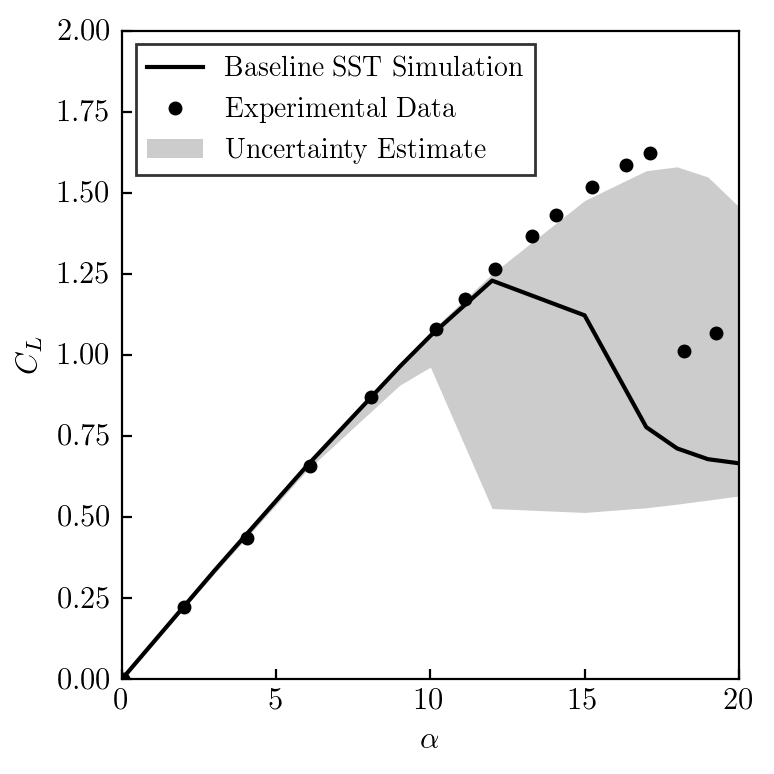

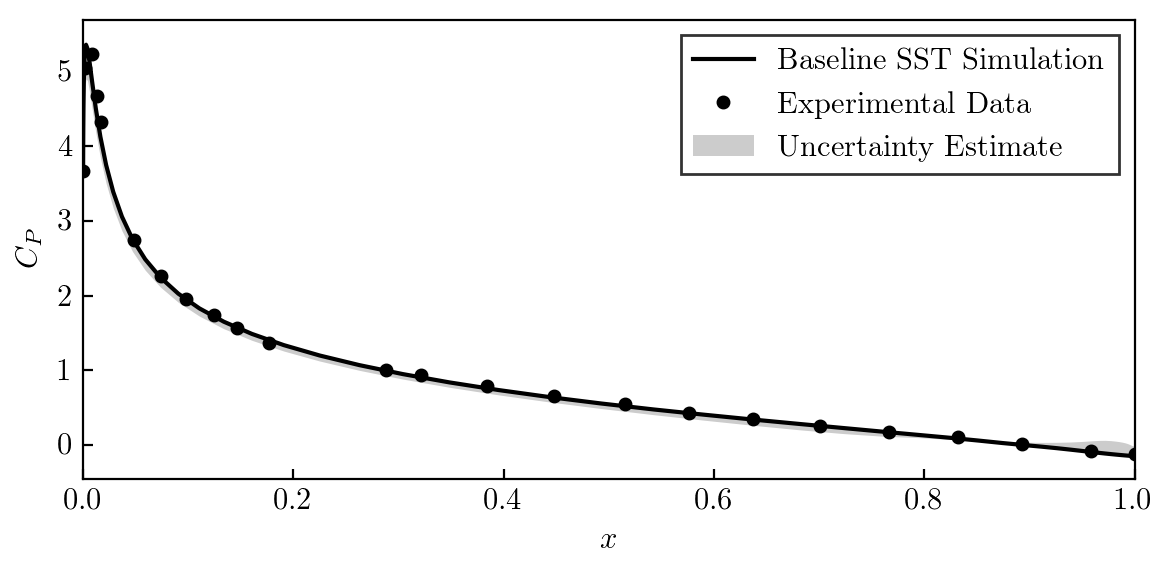

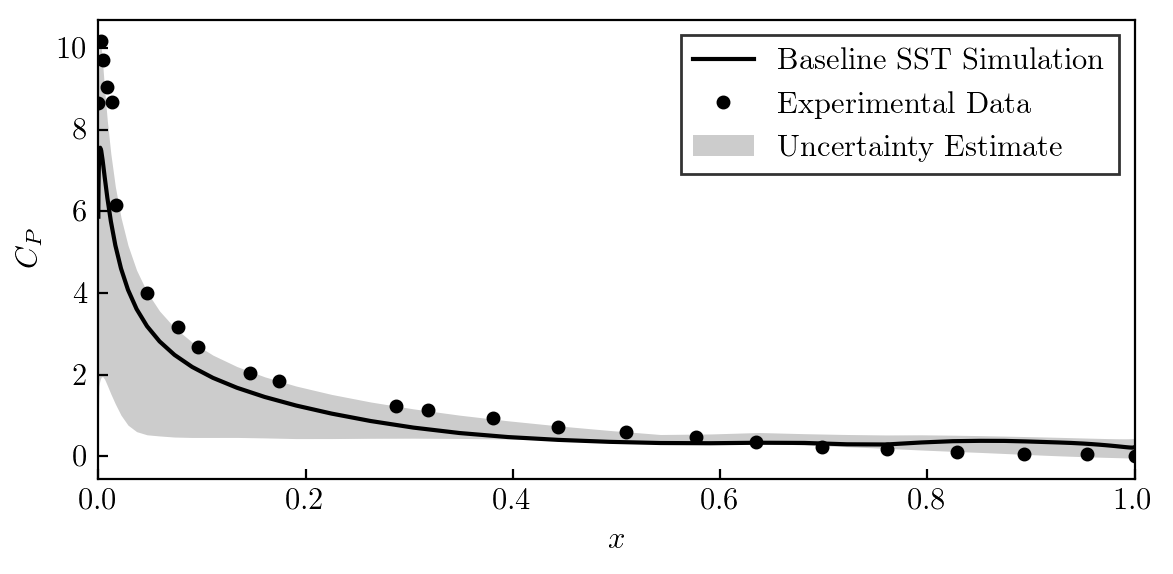

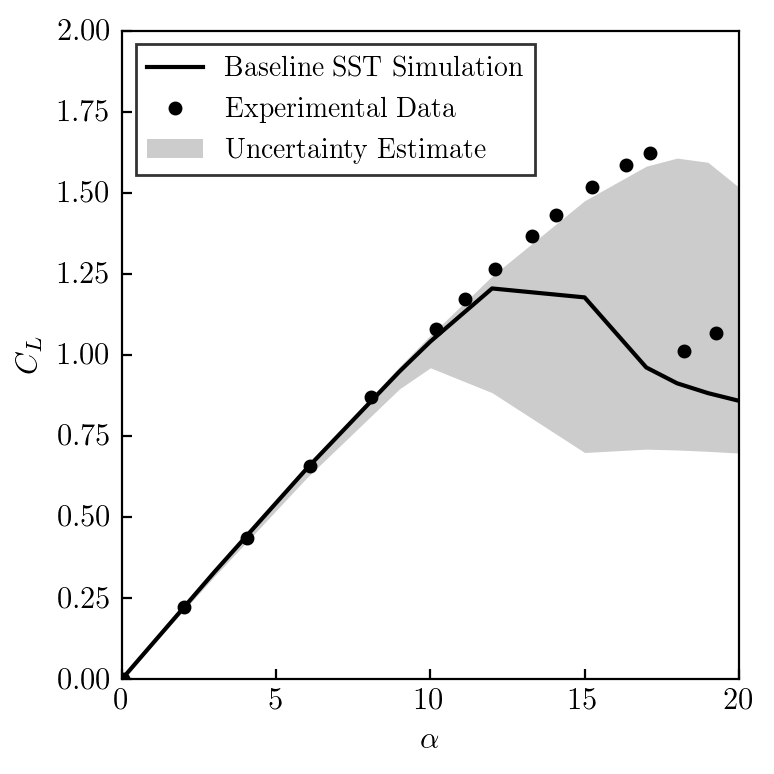

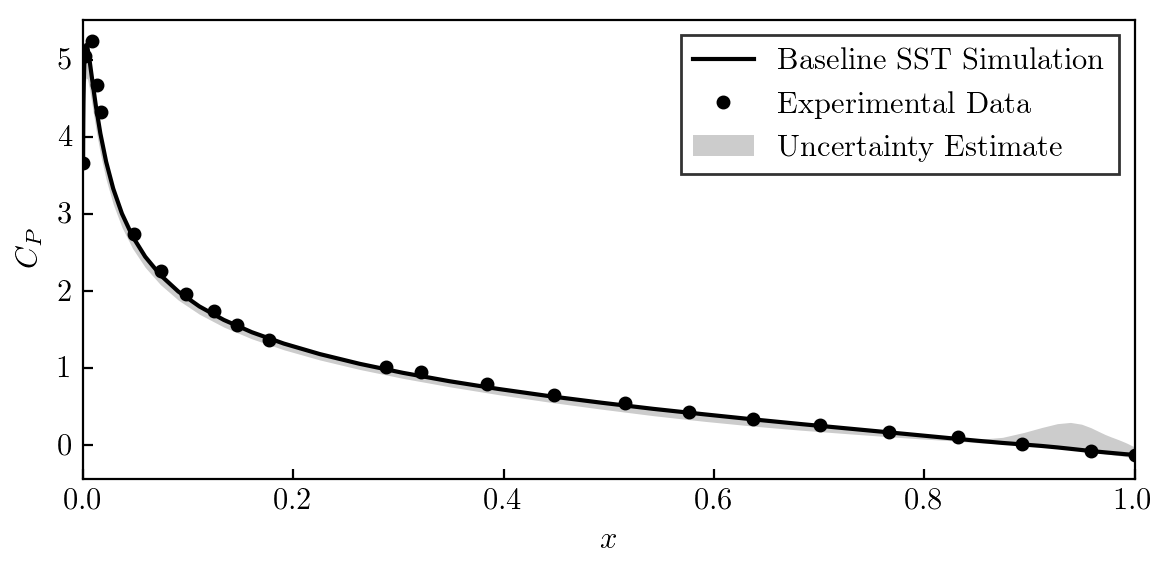

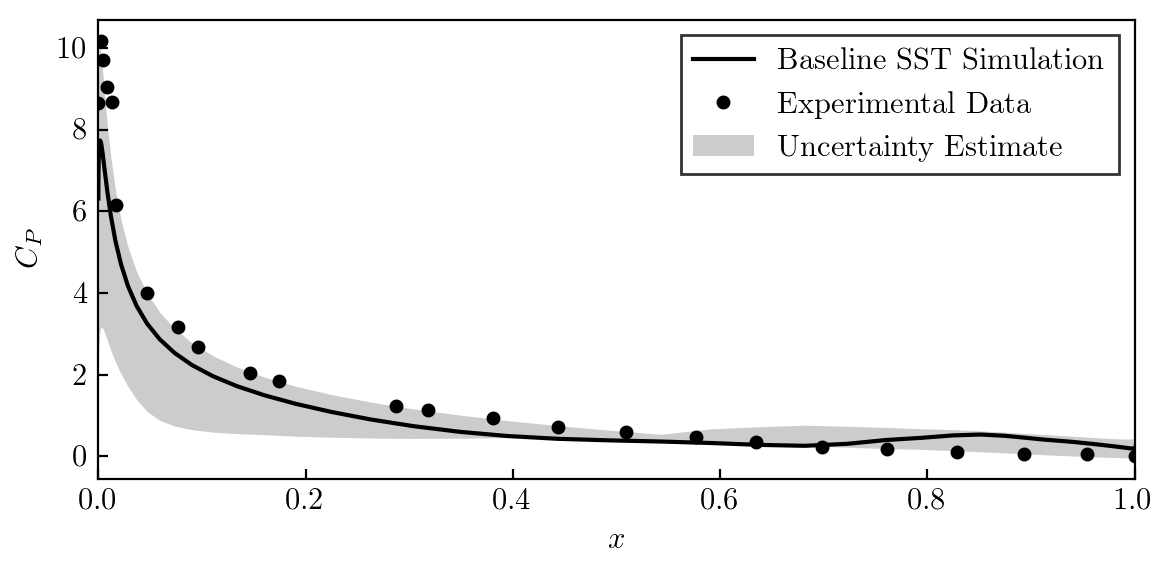

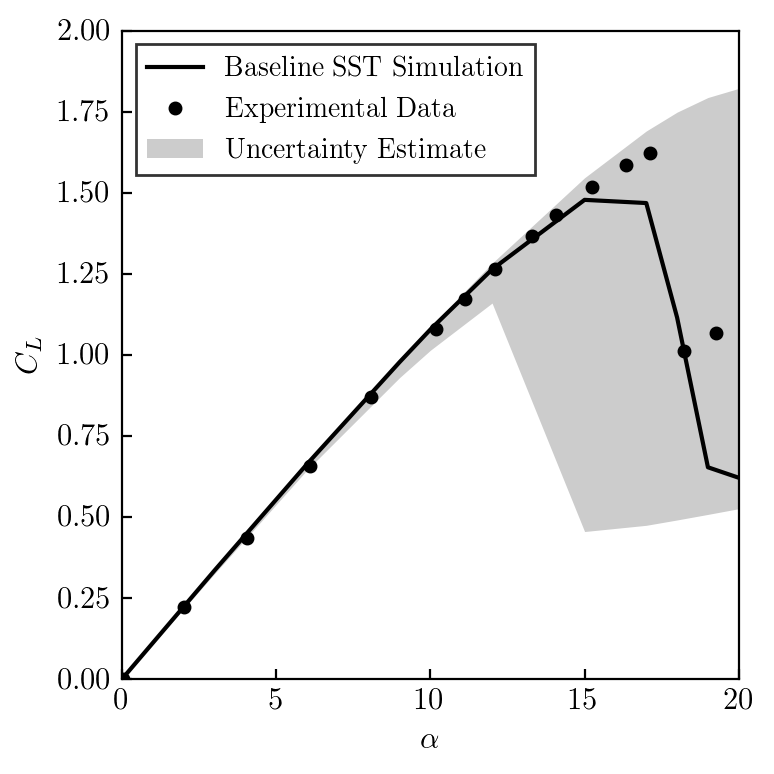

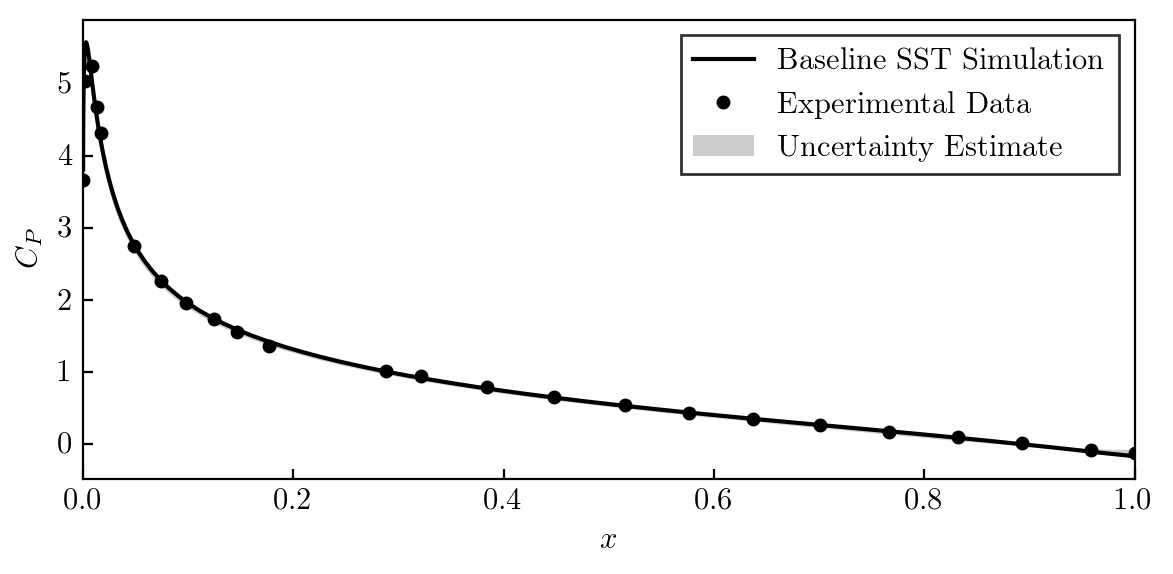

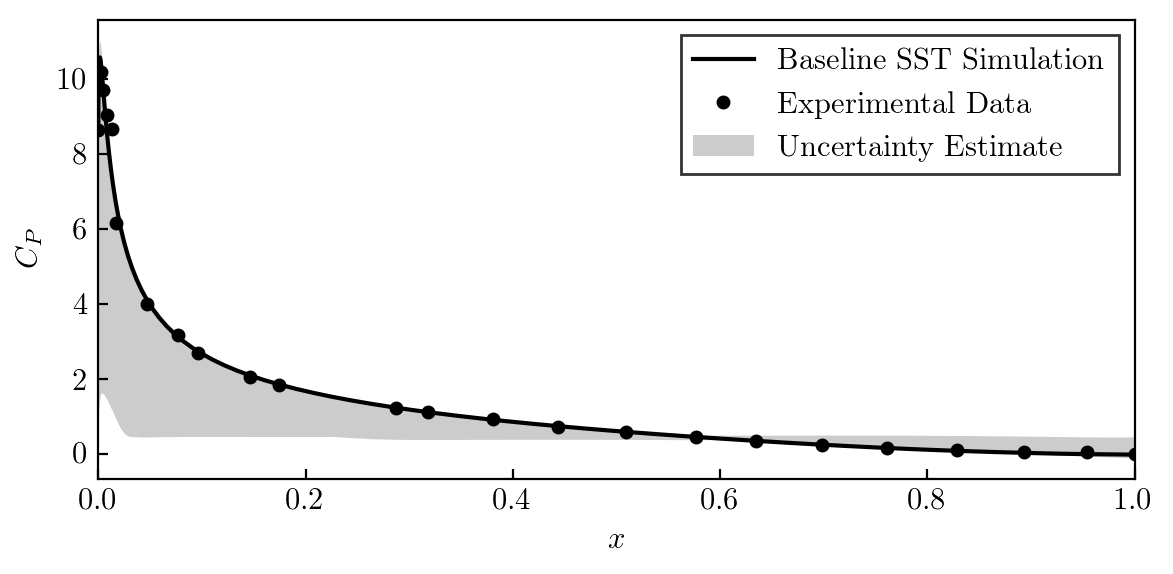

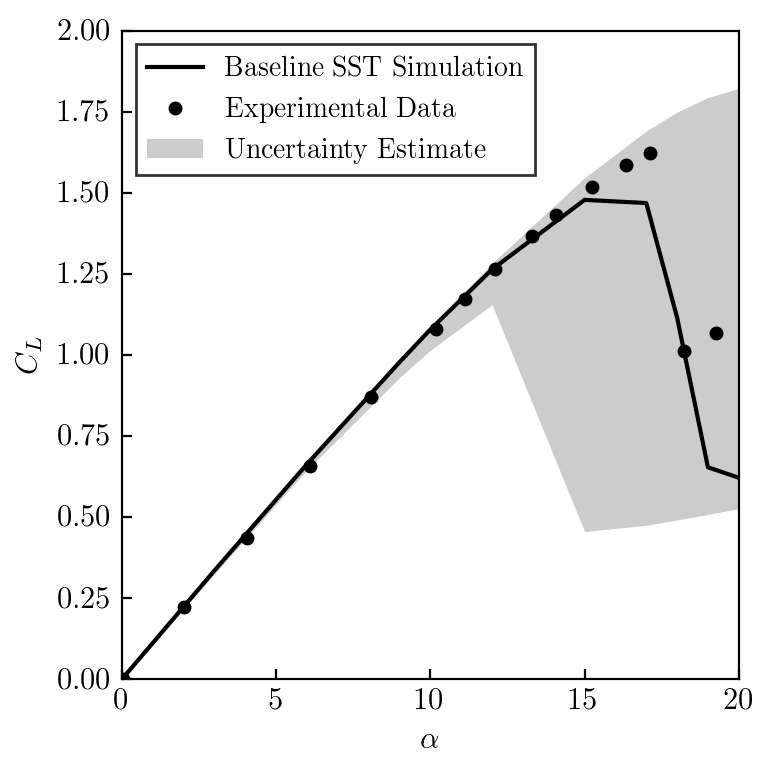

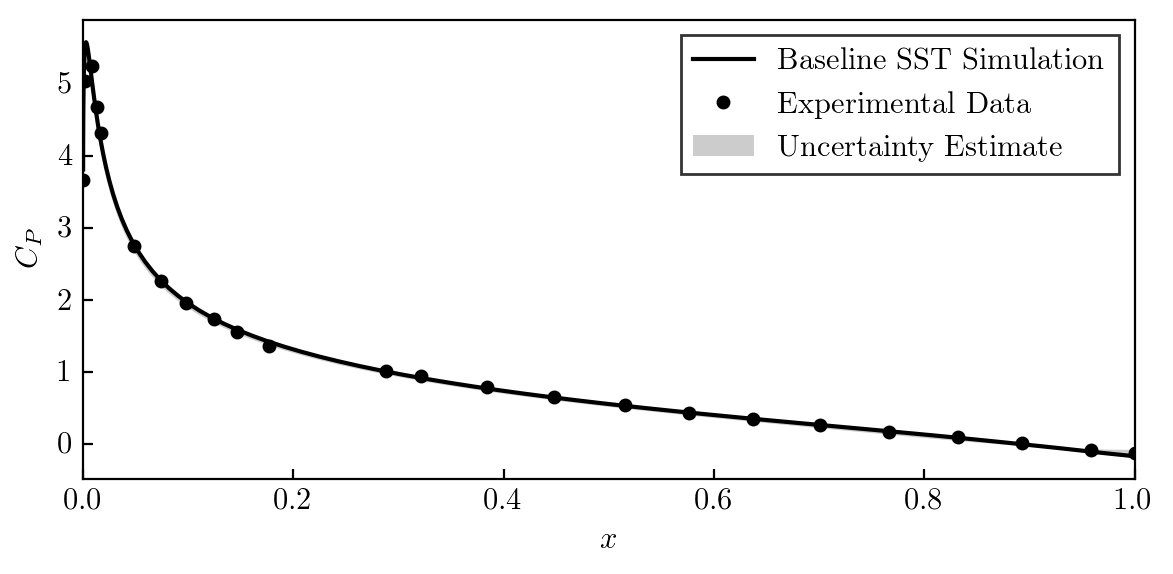

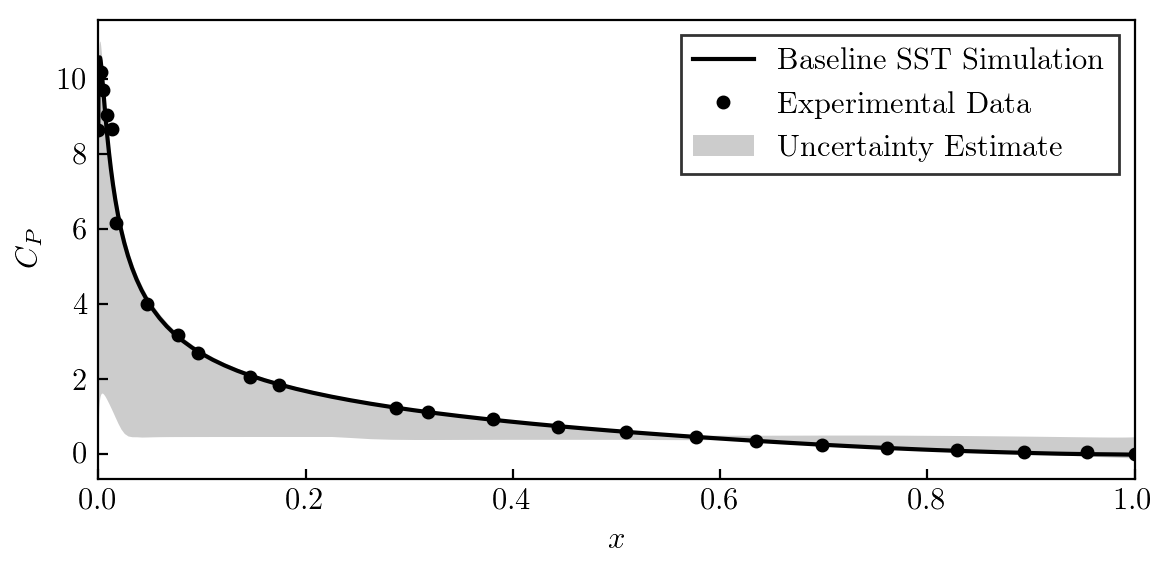

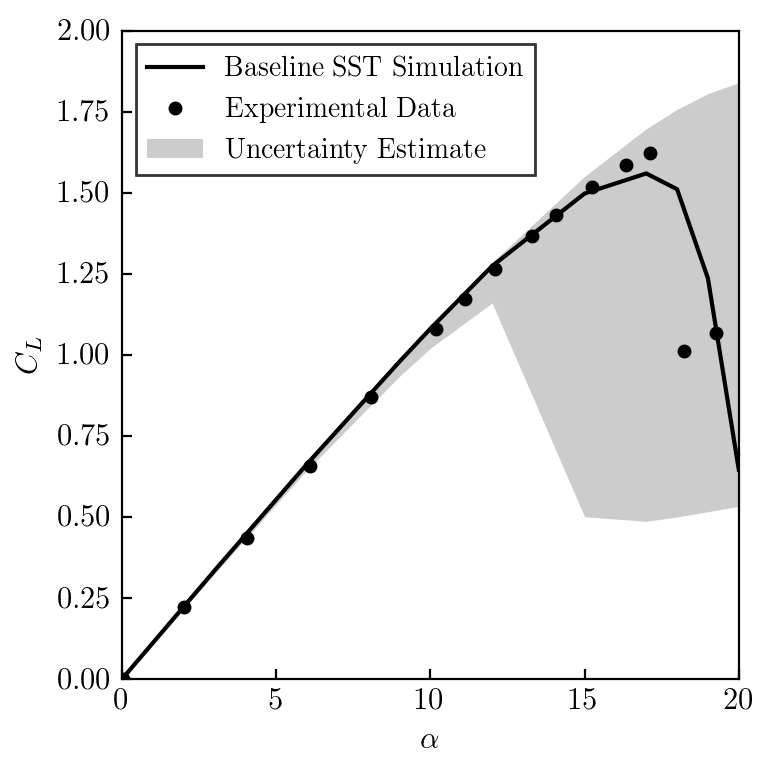

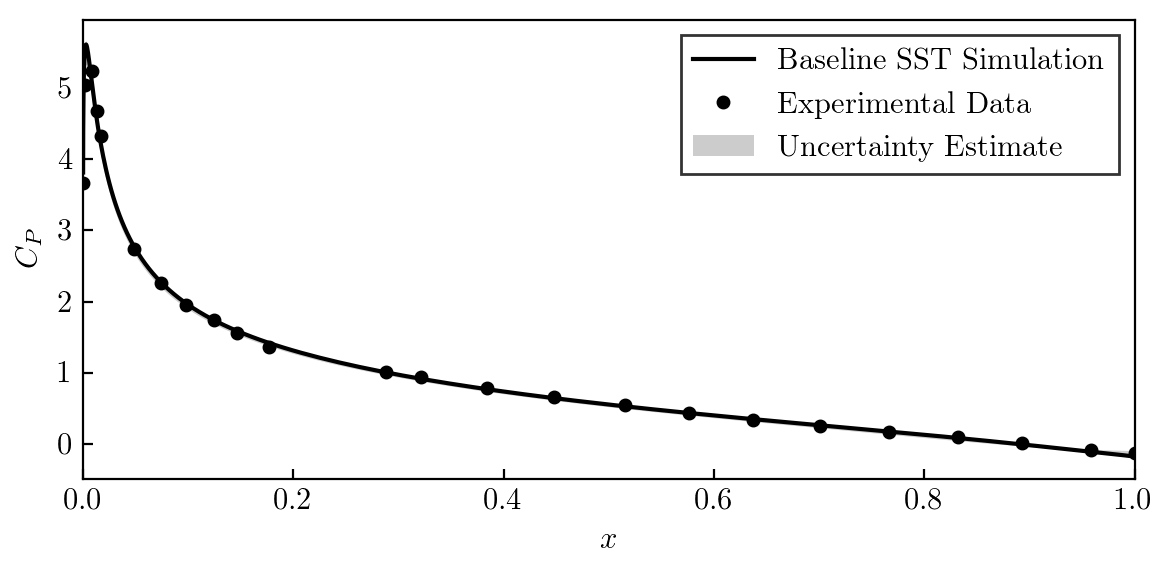

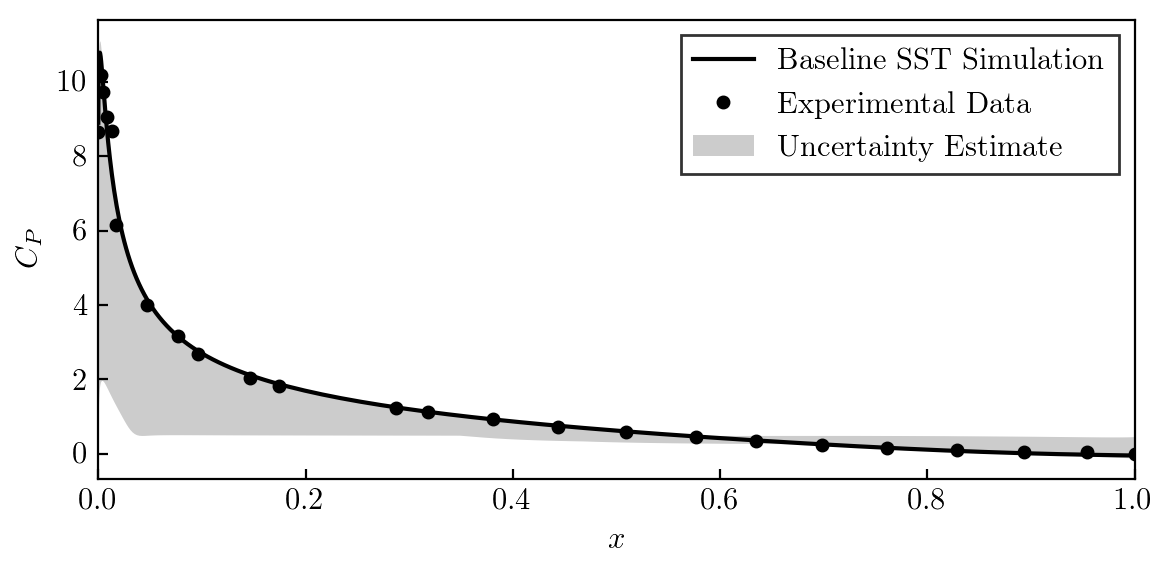

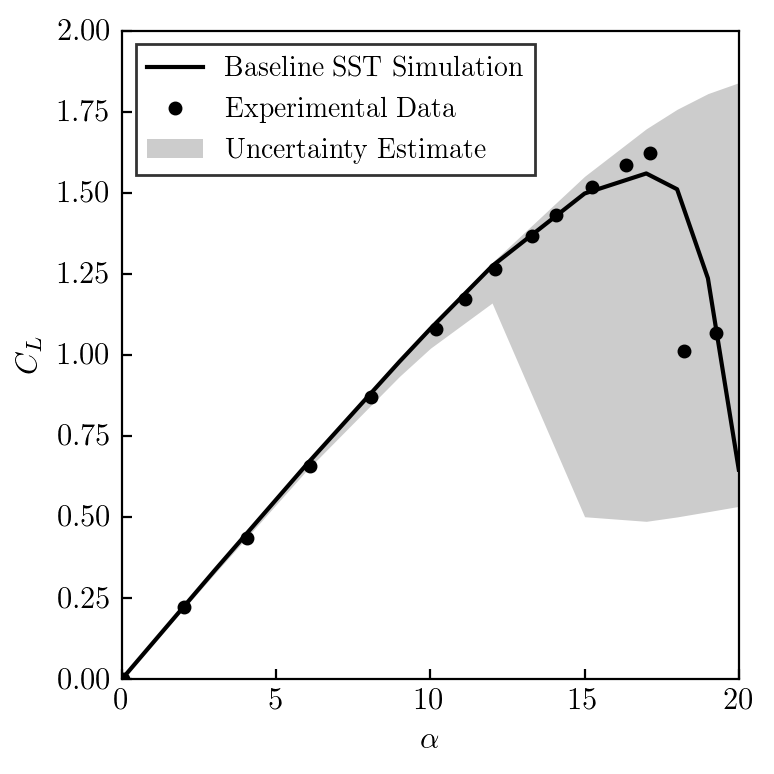

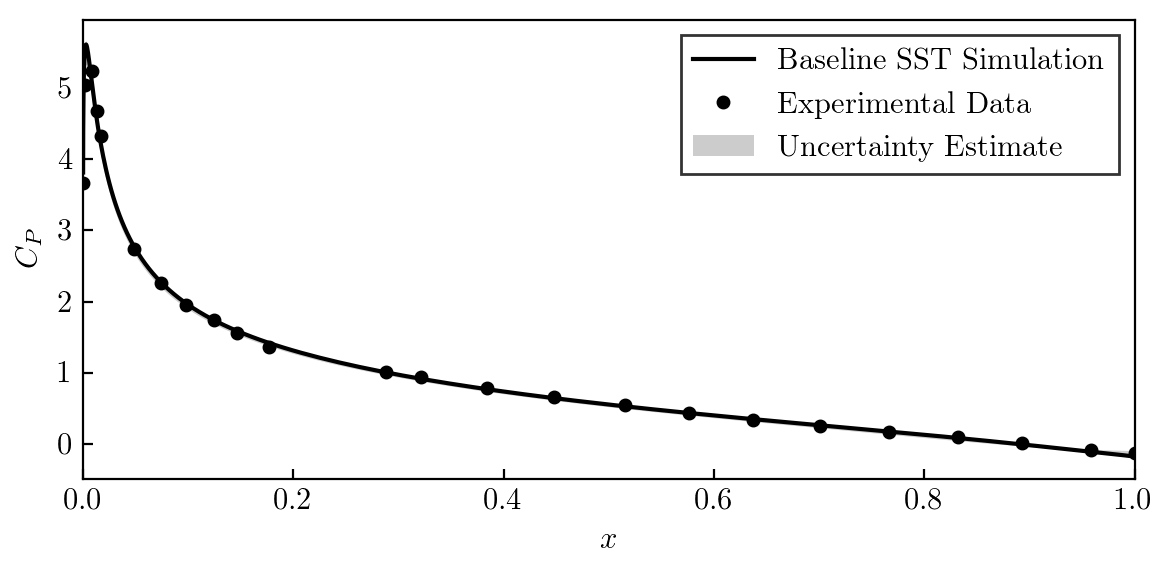

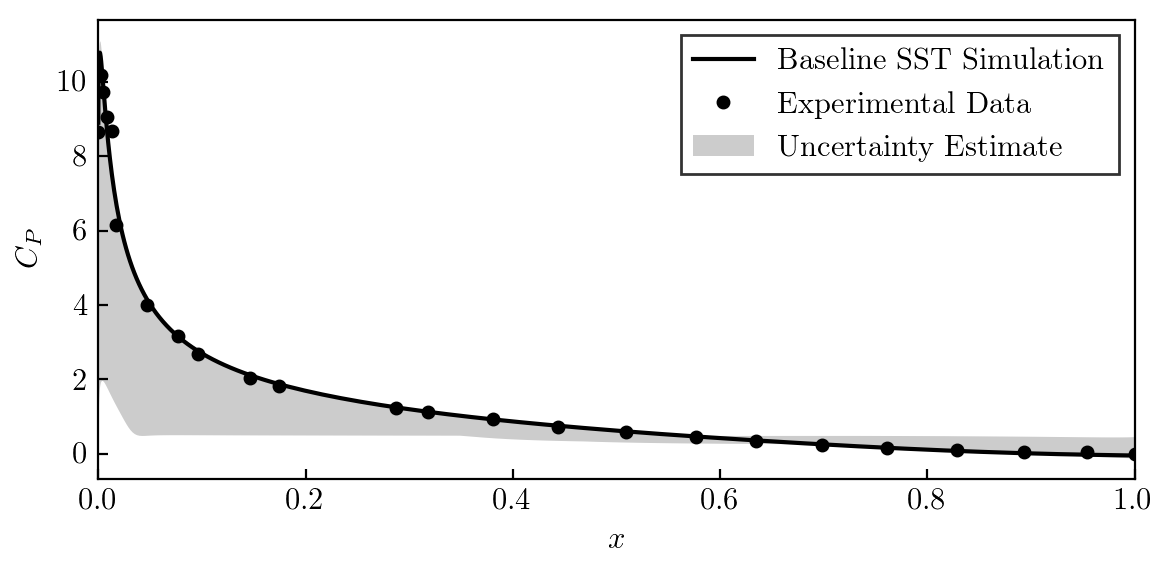

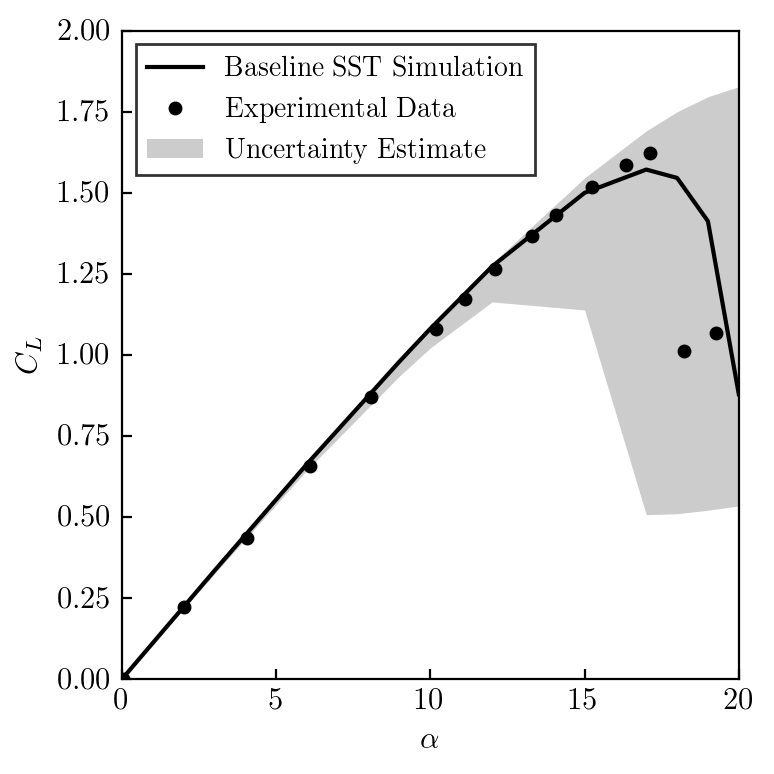

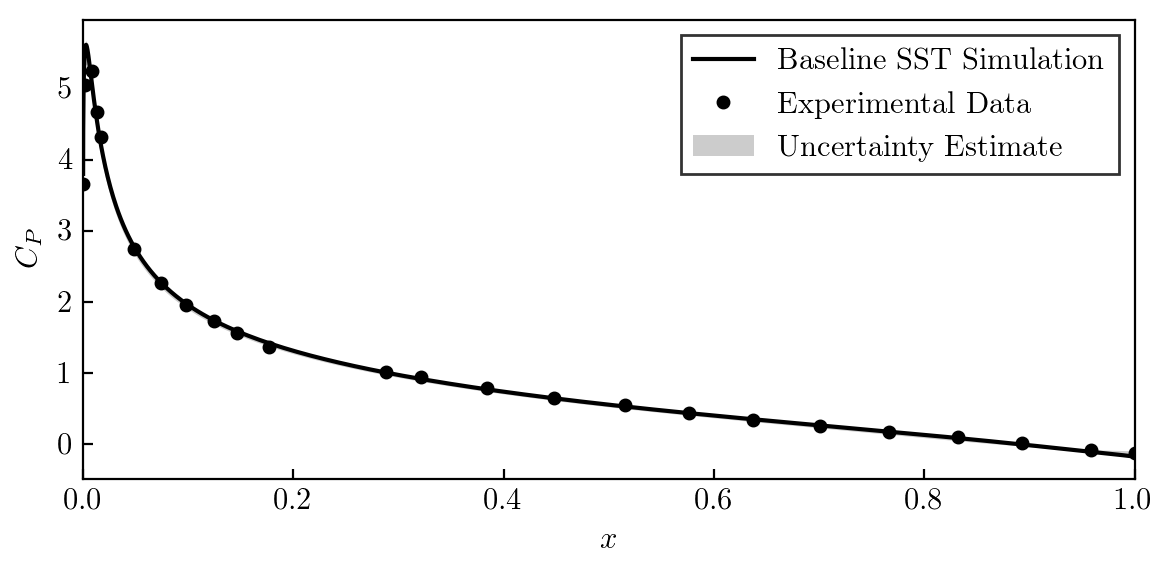

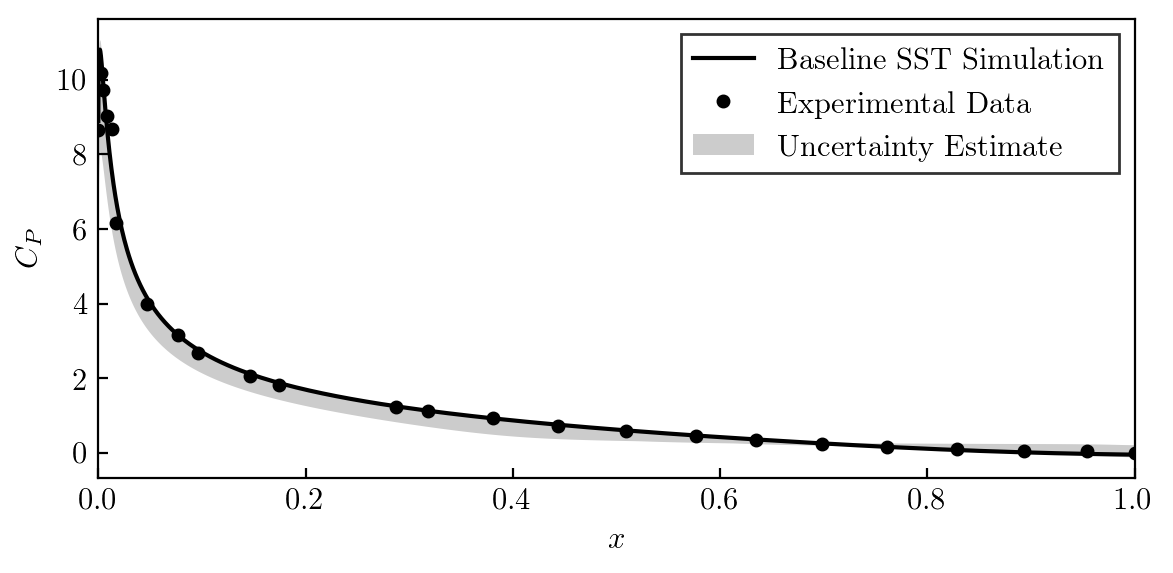

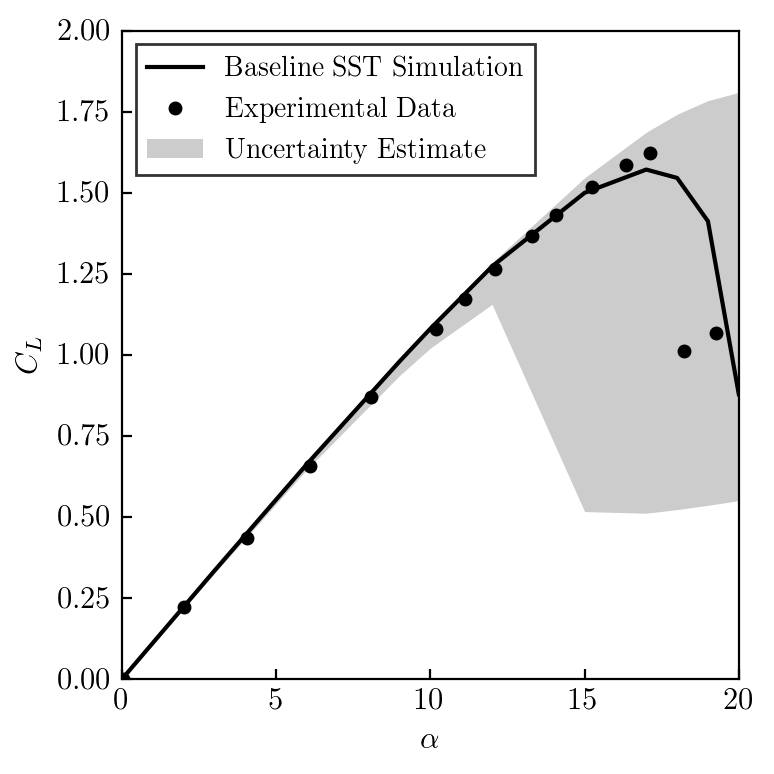

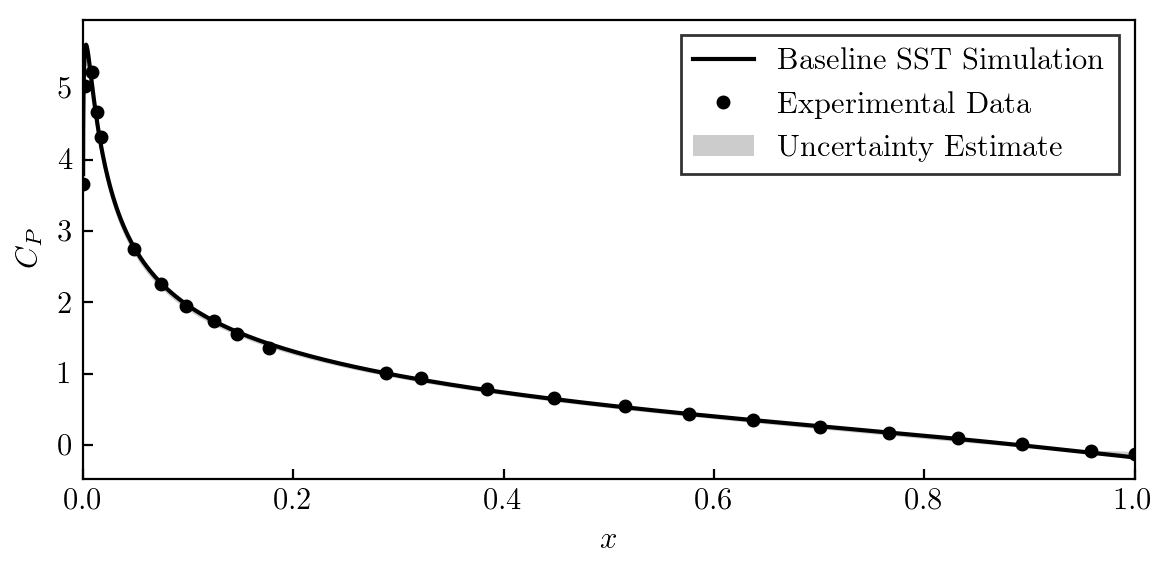

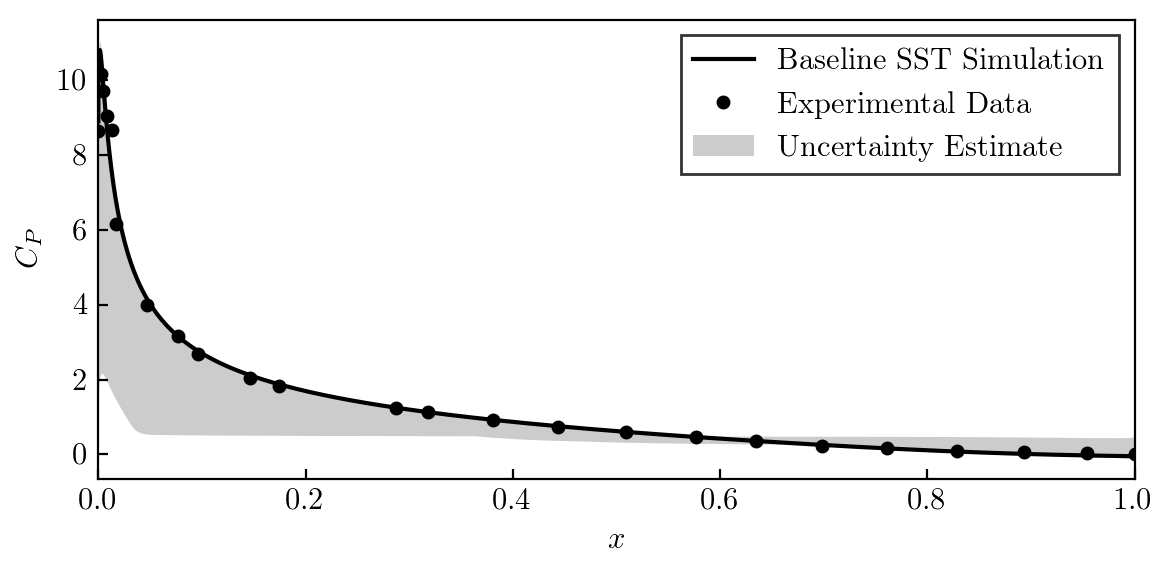

In [4]:
meshes= ["L6","L5","L4","L3"]
coeffs = ["CL"]
grads = [".",'least_squares']
folders= ["10aoa","15aoa"]
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

file_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/naca0012/data/'
exp_vals = {}
exp_cp_data = {}
exp_data = np.loadtxt(file_loc + 'alpha_sweep_exp_data.txt')
exp_vals["AOA"] = exp_data[:,0]
exp_vals["CL"] = exp_data[:,1]
exp_vals["CD"] = exp_data[:,2]

for mesh in meshes:
    for grad in grads:
        for coeff in coeffs:
            if grad == '.':
                grad_name = '2nd_order'
            else:
                grad_name = 'ls'
            fn = file_loc + '{}_{}_{}_vs_alpha_uq.csv'.format(mesh,grad_name,coeff.lower())
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
            plt.figure(figsize=(4,4))
            plt.plot(data['AOA'],data['Baseline'],color='black', label="Baseline SST Simulation")
            plt.plot(exp_vals["AOA"],exp_vals[coeff],marker='o',
                     lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['AOA'],data['Max'],data['Min'],
                             alpha=0.2,color='black',lw=0,label="Uncertainty Estimate")
            plt.xlabel(r'$\alpha$')
            plt.ylabel(ylabels[coeff])
            plt.xlim((0,20))
            plt.ylim(0,2.0)
            plt.legend(loc='upper left',
                       frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
            plt.tick_params(direction='in')
            plt.tight_layout()
            plt.savefig('images/' + '{}_{}_{}_vs_alpha_uq.png'.format(mesh,grad_name,coeff.lower()))
            
        for folder in folders:
            plt.figure(figsize=(6,3))
            exp_data = np.loadtxt(file_loc + folder + '_cpu.dat')
            exp_cp_data[folder] = {}
            exp_cp_data[folder]['X'] = exp_data[:,0]
            exp_cp_data[folder]['Pressure_Coefficient'] = -exp_data[:,1]
            
            fn = file_loc + '{}_{}_{}_cpu.csv'.format(mesh,grad_name,folder)
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            plt.plot(data['X'],-data['Baseline'],color='black', label="Baseline SST Simulation")
            
            plt.plot(exp_cp_data[folder]['X'],exp_cp_data[folder]['Pressure_Coefficient'],
                     marker='o',lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['X'],-data['Max'],-data['Min'],alpha=0.2,
                             color='black',lw=0,label="Uncertainty Estimate")
            plt.xlabel(r'$x$')
            plt.ylabel(r'$C_P$')
            plt.xlim((0,1.0))
            plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False)
            plt.tick_params(direction='in')
            plt.tight_layout()
            plt.savefig('images/' + '{}_{}_{}_cpu.png'.format(mesh,grad_name,folder))

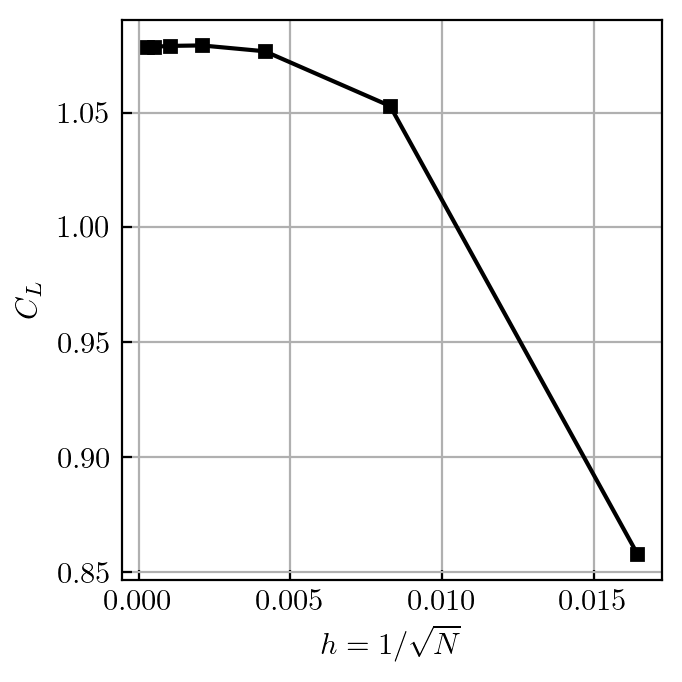

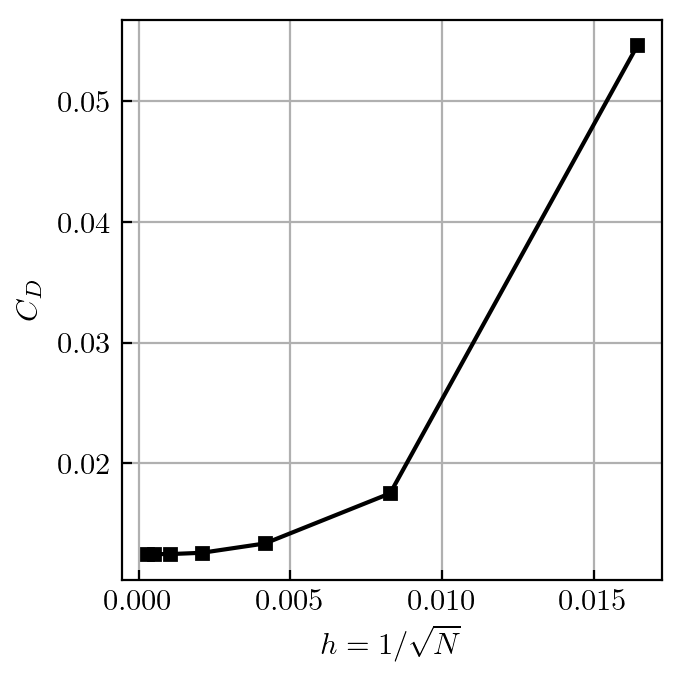

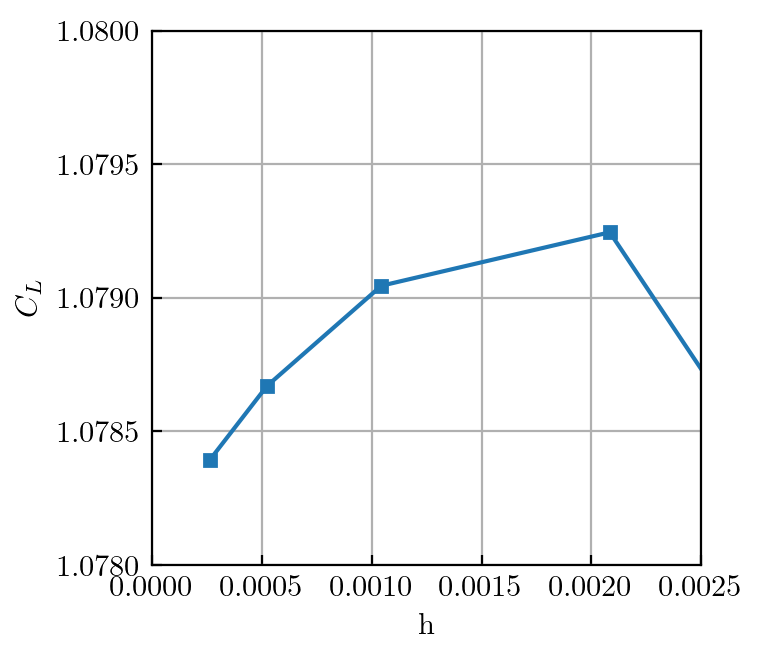

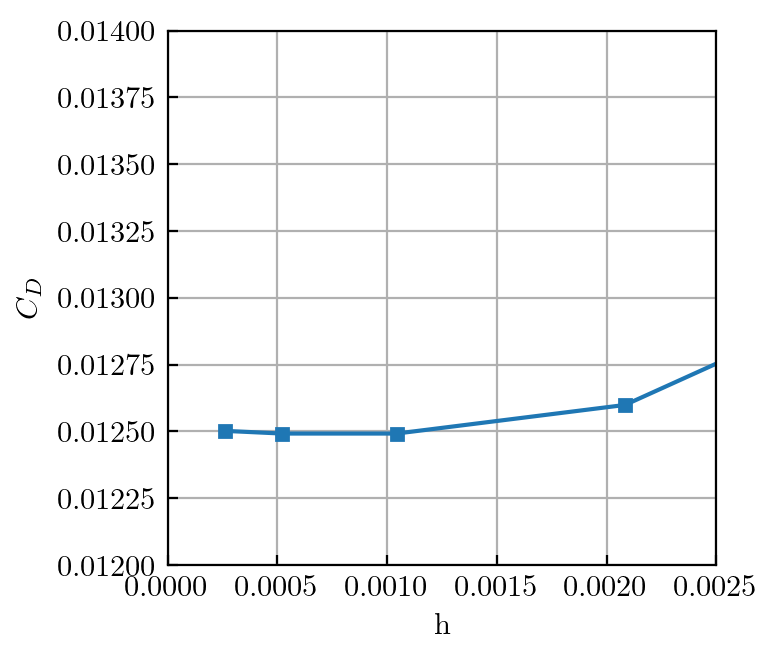

In [10]:
fn = 'data/naca0012_su2_tmr_mesh_convergence.csv'
coeffs = ["CL",'CD']

with open(fn) as f:
    header = f.readline()
header = [h.strip() for h in header.split(',')]
dtype=[]
for var in header:
    dtype.append((var,np.float64))
run_data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
h = run_data['h']
xlims = (0.0,0.006)
ylims = {'CD': (0.01,0.02),
         'CL': (1.07,1.08),
        'CMz':(-0.0085, -0.009)}
ylabels = {'CD': r'$C_D$', 'CL':r'$C_L$', 'CMz':r'$C_m$'}

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

for coeff in coeffs:
    plt.figure()
    plt.plot(h,run_data[coeff],marker='s',color='k')
#     plt.xlim(xlims)
#     plt.ylim(ylims[coeff])
    plt.grid('on')
    plt.ylabel(ylabels[coeff])
    plt.xlabel(r'$h=1/\sqrt{N}$')
    plt.tick_params(direction='in')
    plt.tight_layout()
    plt.savefig('images/' + 'naca0012_{}_tmr_mesh_convergence.png'.format(coeff))
xlims = (0.0,0.0025)
ylims = {'CD': (0.012,0.014),
         'CL': (1.078,1.08),
         'CMz':(-0.0085, -0.009)}
for coeff in coeffs:
    plt.figure()
    plt.plot(h,run_data[coeff],marker='s')
    plt.xlim(xlims)
    plt.ylim(ylims[coeff])
    plt.grid('on')
    plt.ylabel(ylabels[coeff])
    plt.xlabel(r'h')
    plt.tick_params(direction='in')

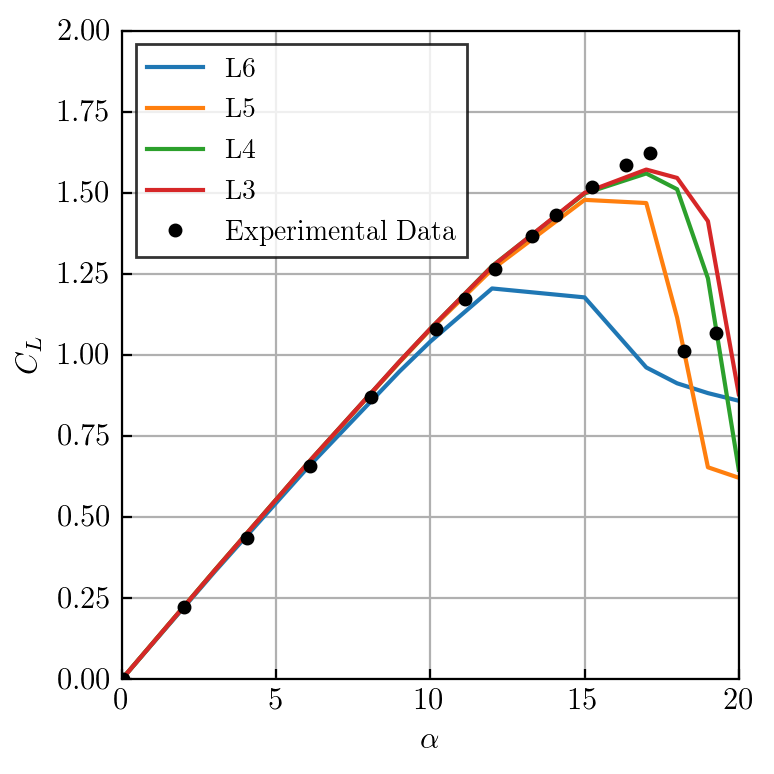

In [23]:
meshes= ["L6","L5","L4","L3"]
coeffs = ["CL"]
grads = ['least_squares']
folders= ["10aoa","15aoa"]
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

file_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/naca0012/data/'
exp_vals = {}
exp_cp_data = {}
exp_data = np.loadtxt(file_loc + 'alpha_sweep_exp_data.txt')
exp_vals["AOA"] = exp_data[:,0]
exp_vals["CL"] = exp_data[:,1]
exp_vals["CD"] = exp_data[:,2]

plt.figure(figsize=(4,4))
for mesh in meshes:
    for grad in grads:
        for coeff in coeffs:
            if grad == '.':
                grad_name = '2nd_order'
            else:
                grad_name = 'ls'
            fn = file_loc + '{}_{}_{}_vs_alpha_uq.csv'.format(mesh,grad_name,coeff.lower())
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
            
            plt.plot(data['AOA'],data['Baseline'], label=mesh)
            if mesh == 'L3':
                plt.plot(exp_vals["AOA"],exp_vals[coeff],marker='o',
                     lw=0.0,color="black", label="Experimental Data")
            plt.xlabel(r'$\alpha$')
            plt.ylabel(ylabels[coeff])
            plt.xlim((0,20))
            plt.ylim(0,2.0)
            plt.legend(loc='upper left',
                       frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
            plt.tick_params(direction='in')
            plt.grid('on')
            plt.tight_layout()
            plt.savefig('images/' + 'naca0012_{}_vs_alpha_tmr_meshes.png'.format(coeff.lower()))
            

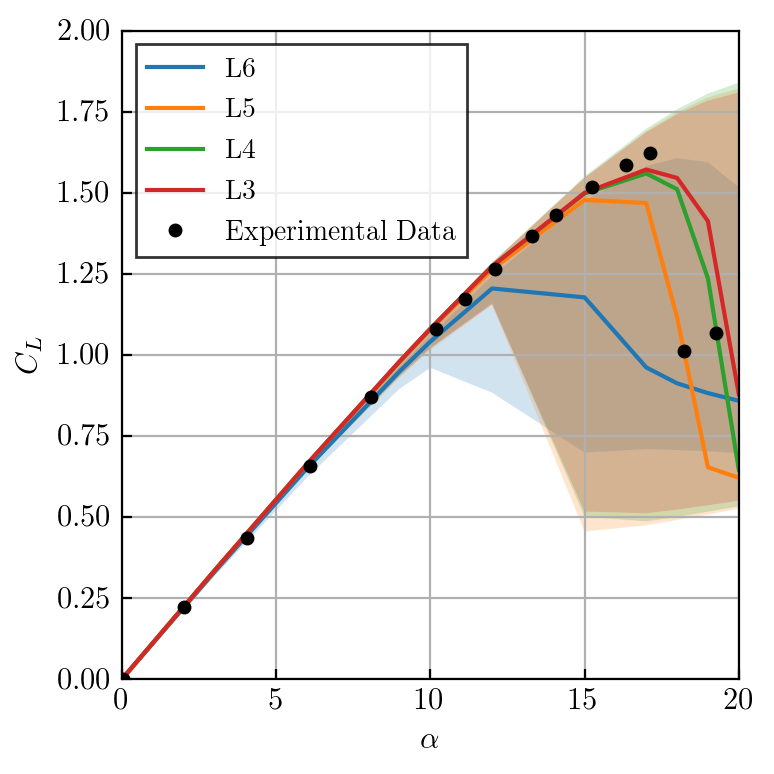

In [24]:
meshes= ["L6","L5","L4","L3"]
coeffs = ["CL"]
grads = ['least_squares']
folders= ["10aoa","15aoa"]
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

file_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/naca0012/data/'
exp_vals = {}
exp_cp_data = {}
exp_data = np.loadtxt(file_loc + 'alpha_sweep_exp_data.txt')
exp_vals["AOA"] = exp_data[:,0]
exp_vals["CL"] = exp_data[:,1]
exp_vals["CD"] = exp_data[:,2]

plt.figure(figsize=(4,4))
for mesh in meshes:
    for grad in grads:
        for coeff in coeffs:
            if grad == '.':
                grad_name = '2nd_order'
            else:
                grad_name = 'ls'
            fn = file_loc + '{}_{}_{}_vs_alpha_uq.csv'.format(mesh,grad_name,coeff.lower())
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
            
            plt.plot(data['AOA'],data['Baseline'], label=mesh)
            if mesh == 'L3':
                plt.plot(exp_vals["AOA"],exp_vals[coeff],marker='o',
                     lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['AOA'],data['Max'],data['Min'],alpha=0.2,lw=0)
            plt.xlabel(r'$\alpha$')
            plt.ylabel(ylabels[coeff])
            plt.xlim((0,20))
            plt.ylim(0,2.0)
            plt.legend(loc='upper left',
                       frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
            plt.tick_params(direction='in')
            plt.grid('on')
            plt.tight_layout()
            plt.savefig('images/' + 'naca0012_{}_vs_alpha_tmr_meshes_uq.png'.format(coeff.lower()))
            

[ 0.  3.  6.  9. 10. 12. 15. 17. 18. 19. 20.]
[0.0010428985940047768, 0.0020836227454807785, 0.004158588368895721, 0.008282869524032146]
[ 0.  3.  6.  9. 10. 12. 15. 17. 18. 19. 20.]
[]
0.0
{'Computed apparent order': array([-4.63879213]), 'Relative fine-grid error': 0.8205017233007772, 'Extrapolated value': array([5.1149082e-08]), 'Extrapolated relative fine-grid error': array([5.89597887]), 'Fine-grid convergence index': array([-1.06873494]), 'Error Code': 2, 'Fine-grid convergence index, Corrected': 2.5602921150006908}
3.0
{'Computed apparent order': array([1.346867]), 'Relative fine-grid error': 0.00043964679427665305, 'Extrapolated value': array([0.33429683]), 'Extrapolated relative fine-grid error': array([0.00028556]), 'Fine-grid convergence index': array([0.00035685]), 'Error Code': 0}
6.0
{'Computed apparent order': array([2.69147227]), 'Relative fine-grid error': 5.672681891626114e-05, 'Extrapolated value': array([0.66332456]), 'Extrapolated relative fine-grid error': array([

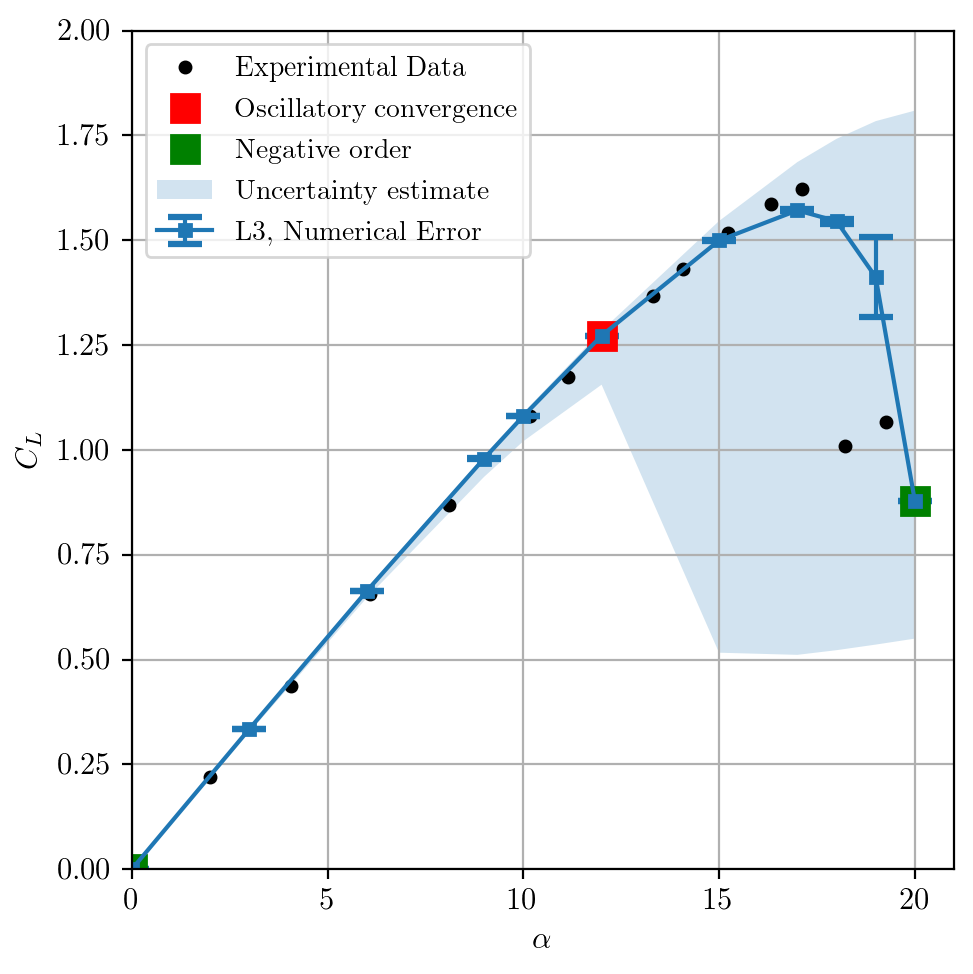

In [41]:
folders= ["00aoa","03aoa", "06aoa", "09aoa", "10aoa", "12aoa","15aoa", "17aoa", "18aoa", "19aoa", "20aoa"]
perts = ["baseline"]
meshes= ["L3","L4","L5","L6"]
points = []
coeffs = ["CL"]

baseline_vals = {}
max_vals = {}
min_vals = {}
aoa_vals = np.array([float(i.split('aoa')[0]) for i in folders])
print(aoa_vals)
points_h = [0.0010428985940047768, 0.0020836227454807785, 0.004158588368895721, 0.008282869524032146]

for mesh in meshes:
    max_vals[mesh] = {}
    min_vals[mesh] = {}
    baseline_vals[mesh] = {}
    for grad in grads:
        max_vals[mesh][grad] = {}
        min_vals[mesh][grad] = {}
        baseline_vals[mesh][grad] = {}
        for coeff in coeffs:
            max_vals[mesh][grad][coeff] = np.zeros(len(folders))
            min_vals[mesh][grad][coeff] = np.zeros(len(folders))
            baseline_vals[mesh][grad][coeff] = np.zeros(len(folders))
            
for mesh in meshes:
    for grad in grads:
        for coeff in coeffs:
            if grad == '.':
                grad_name = '2nd_order'
            else:
                grad_name = 'ls'
            fn = file_loc + '{}_{}_{}_vs_alpha_uq.csv'.format(mesh,grad_name,coeff.lower())
            with open(fn) as f:
                header = f.readline()
            header = [h.strip() for h in header.split(',')]
            dtype=[]
            for var in header:
                dtype.append((var,np.float64))
            data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            baseline_vals[mesh][grad][coeff] = data['Baseline']
            max_vals[mesh][grad][coeff] = data['Max']
            min_vals[mesh][grad][coeff] = data['Min']
            
#             plt.plot(data['AOA'],data['Baseline'], label=mesh)

# for mesh in meshes:
#     for grad in grads:
#         mesh_name = "fam2_" + mesh
#         mesh_fn = mesh_name + "/naca0012_turb_" + mesh_name + ".su2"
#         points.append(get_mesh_data(mesh_fn,"NPOIN"))
#         for aoa,folder in enumerate(folders):
#             for pert in perts:
#                 loc = "{}/{}/{}/{}/"
#                 if mesh == "L3" and (pert != "baseline" or grad == "least_squares" ):
#                     loc = "/media/jmukho/Elements/sherlock_scratch/naca0012/" + loc
#                 loc = loc.format(mesh_name,grad,pert,folder)
#                 hist_data = get_final_vals(loc + "history.csv")
#         #         print(loc + " " + str(hist_data["Inner_Iter"][-1]))
#                 for coeff in coeffs:
#                     if "baseline" in pert:
#                         baseline_vals[mesh][grad][coeff][aoa] = hist_data[coeff]
                
# points_h = [(1/i)**(1/2) for i in points]
print(points_h)
print(aoa_vals)

levels = meshes[0:1]
errors = np.zeros((len(aoa_vals),2))
for j,mesh in enumerate(levels):
    oscillatory_points = np.empty((0,2))
    negative_p = np.empty((0,2))
    print(oscillatory_points)
    plt.figure(figsize=(5,5))
    for coeff in coeffs:
        for i,aoa in enumerate(aoa_vals):
            phi1 = baseline_vals[meshes[j]][grad][coeff][i]
            phi2 = baseline_vals[meshes[j+1]][grad][coeff][i]
            phi3 = baseline_vals[meshes[j+2]][grad][coeff][i]
            print(aoa)
            error_dict = numerical_discretization_error((points_h[j],points_h[j+1],points_h[j+2]),(phi1,phi2,phi3))
            print(error_dict)
            if error_dict['Error Code'] == 0.0:
                errors[i,j] = error_dict['Fine-grid convergence index'] * abs(phi1)
            elif error_dict['Error Code'] == 1.0:
                errors[i,j] = 0.0
                oscillatory_points = np.append(oscillatory_points,[[aoa,phi1]],axis=0)
            elif error_dict['Error Code'] == 2.0:
                errors[i,j] = 0.0
                negative_p = np.append(negative_p,[[aoa,phi1]],axis=0)
            else:
                errors[i,j] = error_dict['Fine-grid convergence index, Corrected'] * abs(phi1)
        plt.plot(exp_vals["AOA"],exp_vals[coeff],marker='o',lw=0.0,color="black", label="Experimental Data")
        plt.errorbar(aoa_vals,baseline_vals[mesh][grad][coeff],yerr=errors[:,j],marker='s',capsize=6,capthick=2.25,label=mesh+", Numerical Error")
        plt.plot(oscillatory_points[:,0],oscillatory_points[:,1],marker='s',markersize=10,color='r',lw=0, label="Oscillatory convergence")
        plt.plot(negative_p[:,0],negative_p[:,1],marker='s',markersize=10,color='g',lw=0, label="Negative order")
        plt.fill_between(aoa_vals,max_vals[mesh][grad][coeff],min_vals[mesh][grad][coeff],alpha=0.2,lw=0, label="Uncertainty estimate")
        plt.xlabel(r'$\alpha$')
        plt.ylabel(ylabels[coeff])
#         plt.title(titles[coeff])
        plt.xlim((0,21))
        plt.ylim(0,2.0)
        plt.legend(loc="upper left",fontsize=10,frameon=True)
        plt.grid()
        plt.tight_layout()
        plt.savefig('images/naca0012_'+coeff+'_vs_alpha_num_uq_'+mesh+'.png')